### Comparison of Forward Euler Method vs Crank-Nicholson

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import pandas as pd

matplotlib.rcParams['figure.figsize'] = [18, 20]
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.005.csv")
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.000005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_fe_inf = potential_fe_inf.rename(columns={"potential(mV)":"fe_inf"})

potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_cn_inf = potential_cn_inf.rename(columns={"potential(mV)":"cn_inf"})

potentials = pd.concat([potential_fe_inf, potential_cn_inf])

header = list(potentials)
hh_v = plt.plot (potentials)
plt.legend(iter(hh_v), header)
plt.title("Crank Nicholson method applied on HH model for different timesteps dt")
plt.xlabel("time (ms)")
plt.ylabel("potential (mv)")
plt.show()
#plt.savefig("fe000005vs_cn000005.png")

### Signal Error
The error occurs on frequency of spikes: that will appears more clearly on FFT of signals
So difference between periods is almost constant in time


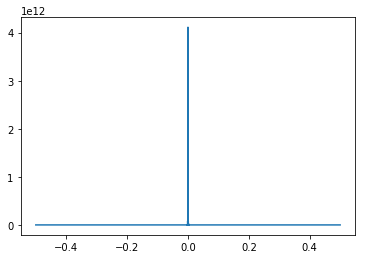

In [6]:
import numpy as np
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_fe_inf = potential_fe_inf.rename(columns={"potential(mV)":"fe_inf"})
fe_fft = np.abs(np.fft.fft(potential_fe_inf["fe_inf"]))**2
time_step = 1.0 / 1.0
fe_freqs = np.fft.fftfreq(potential_fe_inf.size, time_step)
idx = np.argsort(fe_freqs)
plt.plot (fe_freqs[idx], fe_fft[idx])
plt.show()

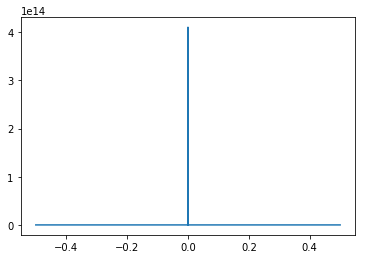

In [4]:
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.0005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_fe_inf = potential_fe_inf.rename(columns={"potential(mV)":"fe_inf"})
fe_fft = np.abs(np.fft.fft(potential_fe_inf["fe_inf"]))**2
time_step = 1.0 / 1.0
freqs = np.fft.fftfreq(potential_fe_inf.size, time_step)
idx = np.argsort(freqs)
plt.plot (freqs[idx], fe_fft[idx])
plt.show()

In [64]:
#old_delay = 0
#local_max_fe = potential_fe_inf[17:32].max()
#local_max_fe_t = potential_fe_inf[17:32].idxmax()
#print ("local max =",local_max_fe.values, " delay =", local_max_fe_t.values)

for i in range(0,10):
    local_max_fe = potential_fe_inf[i*15+3:(i+1)*15+3].max()
    local_max_fe_t = potential_fe_inf[i*15+3:(i+1)*15+3].idxmax()
    local_max_cn = potential_cn_inf[i*15+3:(i+1)*15+3].max()
    local_max_cn_t = potential_cn_inf[i*15+3:(i+1)*15+3].idxmax()
#    print ("local max =",local_max_fe.values, " delay =", (local_max_fe_t - old_delay).values)
    print ("local max =",local_max_cn.values, "period between maximums=", (local_max_cn_t - old_delay).values)
#
#    print (local_max_fe_t)
#    print (local_max_fe_t.values - local_max_cn_t.values)
    old_delay = local_max_cn_t


local max = [36.0674] period between maximums= [-131.769]
local max = [35.7335] period between maximums= [14.6512]
local max = [35.7085] period between maximums= [14.6406]
local max = [35.7067] period between maximums= [14.64]
local max = [35.7065] period between maximums= [14.6393]
local max = [35.7065] period between maximums= [14.6397]
local max = [35.7065] period between maximums= [14.6392]
local max = [35.7065] period between maximums= [14.64]
local max = [35.7065] period between maximums= [14.64]
local max = [35.7065] period between maximums= [14.639]


In [65]:
#old_delay = 0
#local_max_fe = potential_fe_inf[17:32].max()
#local_max_fe_t = potential_fe_inf[17:32].idxmax()
#print ("local max =",local_max_fe.values, " delay =", local_max_fe_t.values)

for i in range(0,10):
    local_max_fe = potential_fe_inf[i*15+3:(i+1)*15+3].max()
    local_max_fe_t = potential_fe_inf[i*15+3:(i+1)*15+3].idxmax()
    local_max_cn = potential_cn_inf[i*15+3:(i+1)*15+3].max()
    local_max_cn_t = potential_cn_inf[i*15+3:(i+1)*15+3].idxmax()
#    print ("local max =",local_max_fe.values, " delay =", (local_max_fe_t - old_delay).values)
    print ("local max =",local_max_fe.values, "period between maximums=", (local_max_fe_t - old_delay).values)
#
#    print (local_max_fe_t)
#    print (local_max_fe_t.values - local_max_cn_t.values)
    old_delay = local_max_fe_t


local max = [36.3643] period between maximums= [nan nan]
local max = [36.0364] period between maximums= [14.615]
local max = [36.0101] period between maximums= [14.6]
local max = [36.0094] period between maximums= [14.605]
local max = [36.0097] period between maximums= [14.6]
local max = [36.0091] period between maximums= [14.6]
local max = [36.0084] period between maximums= [14.605]
local max = [36.0095] period between maximums= [14.6]
local max = [36.0096] period between maximums= [14.6]
local max = [36.0087] period between maximums= [14.6]


In [67]:
for i in range(0,10):
    local_max_fe = potential_fe_inf[i*15+3:(i+1)*15+3].max()
    local_max_fe_t = potential_fe_inf[i*15+3:(i+1)*15+3].idxmax()
    local_max_cn = potential_cn_inf[i*15+3:(i+1)*15+3].max()
    local_max_cn_t = potential_cn_inf[i*15+3:(i+1)*15+3].idxmax()
    period_fe = local_max_fe_t.values - old_delay_fe.values
    period_cn = local_max_cn_t.values - old_delay_cn.values
    print ("error on period = ", period_fe - period_cn)
    old_delay_cn = local_max_cn_t
    old_delay_fe = local_max_fe_t
   

error on period =  [0.344]
error on period =  [-0.0362]
error on period =  [-0.0406]
error on period =  [-0.035]
error on period =  [-0.0393]
error on period =  [-0.0397]
error on period =  [-0.0342]
error on period =  [-0.04]
error on period =  [-0.04]
error on period =  [-0.039]


In [24]:
#potential_cn_inf["cn_inf"].corr(potential_fe_inf["fe_inf"])
import numpy as np

cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.000005.csv")
potential_cn_inf = potential_cn_inf.rename(columns={"cn_inf":"potential(mV)"})
potential_fe_inf = potential_fe_inf.rename(columns={"fe_inf":"potential(mV)"})

potential_cn_inf_2, potential_fe_inf_2 = potential_fe_inf.align(potential_cn_inf)
#potential_cn_inf_2
errors = potential_fe_inf_2.interpolate(method='time') - potential_cn_inf_2
#errors
errors = np.square(errors)
#errors
errors.mean()

potential(mV)    0.000108
dtype: float64

In [1]:
#del fe_inf 
#del potential_fe_inf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import pandas as pd
import numpy as np

cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.000005.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")

In [3]:
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.00005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_cn_inf_2, potential_fe_inf_2 = potential_fe_inf.align(potential_cn_inf)
errors = potential_fe_inf_2.interpolate(method='time') - potential_cn_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.018272
dtype: float64

In [2]:
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.0005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_cn_inf_2, potential_fe_inf_2 = potential_fe_inf.align(potential_cn_inf)
errors = potential_fe_inf_2.interpolate(method='time') - potential_cn_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    1.811461
dtype: float64

In [4]:
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_cn_inf_2, potential_fe_inf_2 = potential_fe_inf.align(potential_cn_inf)
errors = potential_fe_inf_2.interpolate(method='time') - potential_cn_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    143.758125
dtype: float64

In [5]:
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.05.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_cn_inf_2, potential_fe_inf_2 = potential_fe_inf.align(potential_cn_inf)
errors = potential_fe_inf_2.interpolate(method='time') - potential_cn_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    1352.226019
dtype: float64

In [6]:
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.00005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_cn_inf_2, potential_fe_inf_2 = potential_fe_inf.align(potential_cn_inf)
errors = potential_fe_inf_2.interpolate(method='time') - potential_cn_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.000181
dtype: float64

In [10]:
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.0005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_cn_inf_2, potential_fe_inf_2 = potential_fe_inf.align(potential_cn_inf)
errors = potential_fe_inf_2.interpolate(method='time') - potential_cn_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.000558
dtype: float64

In [11]:
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_cn_inf_2, potential_fe_inf_2 = potential_fe_inf.align(potential_cn_inf)
errors = potential_fe_inf_2.interpolate(method='time') - potential_cn_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.024064
dtype: float64

In [12]:
fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.05.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")
potential_cn_inf_2, potential_fe_inf_2 = potential_fe_inf.align(potential_cn_inf)
errors = potential_fe_inf_2.interpolate(method='time') - potential_cn_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.207514
dtype: float64

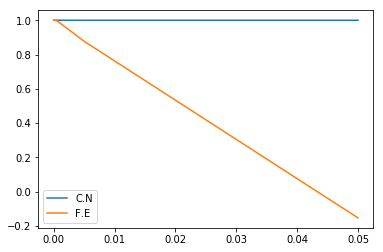

In [25]:
cross = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cross-corelations.csv")
pivoted = cross.pivot(index='timestep', columns='method', values='error')
header = list(pivoted)
hh_v = plt.plot (pivoted)
plt.legend(iter(hh_v), header)
#plt.title("Crank Nicholson method applied on HH model for different timesteps dt")
#plt.xlabel("time (ms)")
#plt.ylabel("potential (mv)")
plt.show()

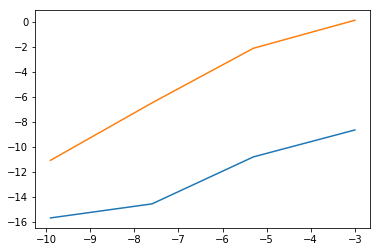

In [45]:
import numpy as np
x = [a for [a,b,c] in cross.as_matrix()]
x = np.array(x[1:5])
y = pivoted.as_matrix()
plt.plot(np.log(x),np.log(1-np.array(y[1:5,0])))
plt.plot(np.log(x),np.log(1-np.array(y[1:5,1])))

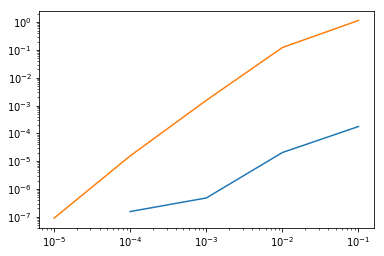

In [50]:

x = [a for [a,b,c] in cross.as_matrix()]
x = x[0:5]
y = pivoted.as_matrix()
plt.loglog(2*np.array(x[1:5]),1-np.array(y[1:5,0]))
plt.loglog(2*np.array(x),1-np.array(y[:,1]))

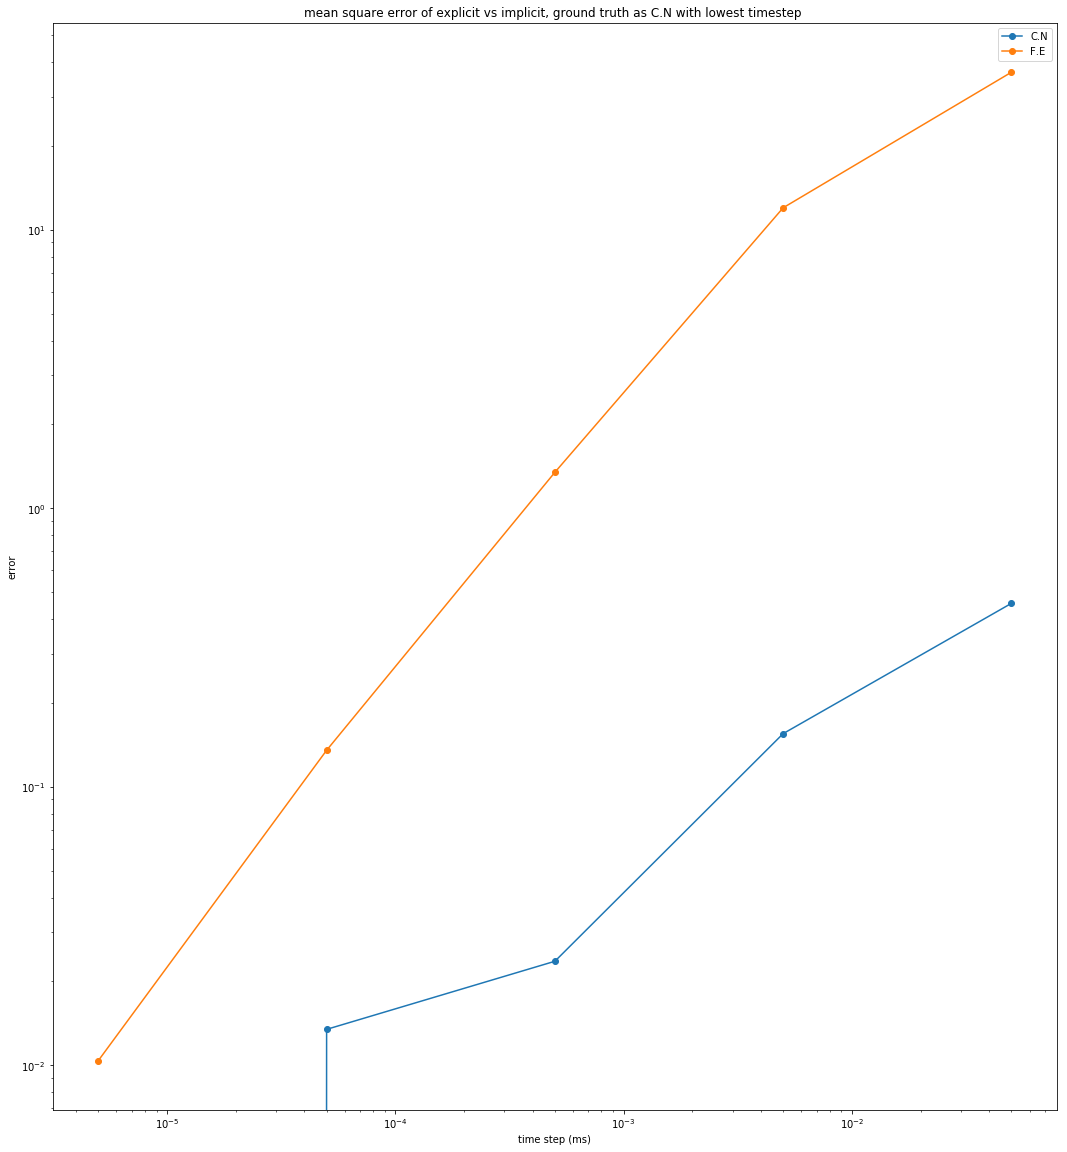

In [13]:
matplotlib.rcParams['figure.figsize'] = [18, 20]
ms = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/mean_square.csv")
pivoted = ms.pivot(index='timestep', columns='method', values='error')
header = list(pivoted)
#pivoted
piv = np.sqrt(pivoted[['C.N', 'F.E']])
hh_v = plt.loglog(piv, marker='o')
plt.title("mean square error of explicit vs implicit, ground truth as C.N with lowest timestep ")
plt.xlabel("time step (ms)")
plt.ylabel("error")
plt.legend(iter(hh_v), header)
plt.savefig("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/mean_square.png")

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import pandas as pd
import numpy as np

fe_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.000005.csv")
potential_fe_inf = fe_inf[["time(ms)", "potential(mV)"]].copy()
potential_fe_inf = potential_fe_inf.set_index("time(ms)")

In [3]:
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.000005.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_fe_inf_2, potential_cn_inf_2 = potential_cn_inf.align(potential_fe_inf)
errors = potential_cn_inf_2.interpolate(method='time') - potential_fe_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.000108
dtype: float64

In [4]:
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.00005.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_fe_inf_2, potential_cn_inf_2 = potential_cn_inf.align(potential_fe_inf)
errors = potential_cn_inf_2.interpolate(method='time') - potential_fe_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.000314
dtype: float64

In [5]:
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.0005.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_fe_inf_2, potential_cn_inf_2 = potential_cn_inf.align(potential_fe_inf)
errors = potential_cn_inf_2.interpolate(method='time') - potential_fe_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.000227
dtype: float64

In [6]:
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.005.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_fe_inf_2, potential_cn_inf_2 = potential_cn_inf.align(potential_fe_inf)
errors = potential_cn_inf_2.interpolate(method='time') - potential_fe_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.0203
dtype: float64

In [7]:
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/cn_0.05.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_fe_inf_2, potential_cn_inf_2 = potential_cn_inf.align(potential_fe_inf)
errors = potential_cn_inf_2.interpolate(method='time') - potential_fe_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.203548
dtype: float64

In [8]:
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.00005.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_fe_inf_2, potential_cn_inf_2 = potential_cn_inf.align(potential_fe_inf)
errors = potential_cn_inf_2.interpolate(method='time') - potential_fe_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    0.014875
dtype: float64

In [9]:
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.0005.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_fe_inf_2, potential_cn_inf_2 = potential_cn_inf.align(potential_fe_inf)
errors = potential_cn_inf_2.interpolate(method='time') - potential_fe_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    1.776061
dtype: float64

In [10]:
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.005.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_fe_inf_2, potential_cn_inf_2 = potential_cn_inf.align(potential_fe_inf)
errors = potential_cn_inf_2.interpolate(method='time') - potential_fe_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    143.524128
dtype: float64

In [11]:
cn_inf = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/fe_0.05.csv")
potential_cn_inf = cn_inf[["time(ms)", "potential(mV)"]].copy()
potential_cn_inf = potential_cn_inf.set_index("time(ms)")
potential_fe_inf_2, potential_cn_inf_2 = potential_cn_inf.align(potential_fe_inf)
errors = potential_cn_inf_2.interpolate(method='time') - potential_fe_inf_2
errors = np.square(errors)
errors.mean()

potential(mV)    1352.20959
dtype: float64

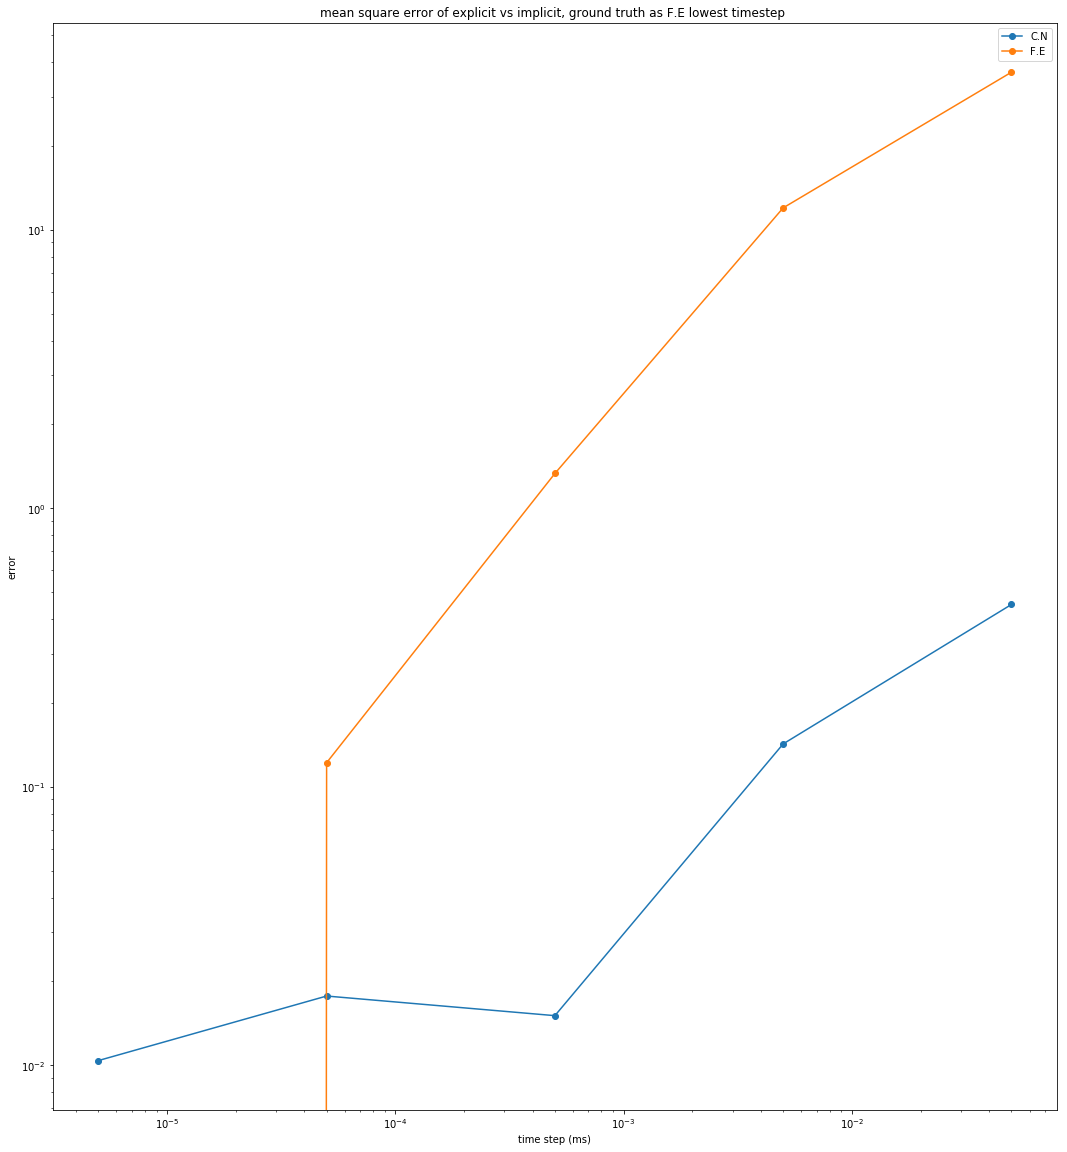

In [12]:
matplotlib.rcParams['figure.figsize'] = [18, 20]
ms = pd.read_csv("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/mean_square_from_fe.csv")
pivoted = ms.pivot(index='timestep', columns='method', values='error')
header = list(pivoted)
#pivoted
piv = np.sqrt(pivoted[['C.N', 'F.E']])
hh_v = plt.loglog(piv, marker='o')
plt.title("mean square error of explicit vs implicit, ground truth as F.E lowest timestep ")
plt.xlabel("time step (ms)")
plt.ylabel("error")
plt.legend(iter(hh_v), header)
plt.savefig("/home/fouriaux/Devel/reaching_ftb/hh/error_analysis/mean_square_on_FE.png")

In [14]:
pivoted

method,C.N,F.E
timestep,,
0.000005,0.000000,0.000108
0.000050,0.000181,0.018272
0.000500,0.000558,1.811461
0.005000,0.024064,143.758125
0.050000,0.207514,1352.226019
